1.0

平均準確度: 0.69
模型準確率: 0.7464788732394366
              precision    recall  f1-score   support

          新增       0.74      0.91      0.82        34
        保持不變       0.45      0.31      0.37        16
          減少       0.94      0.81      0.87        21

    accuracy                           0.75        71
   macro avg       0.71      0.68      0.69        71
weighted avg       0.74      0.75      0.73        71



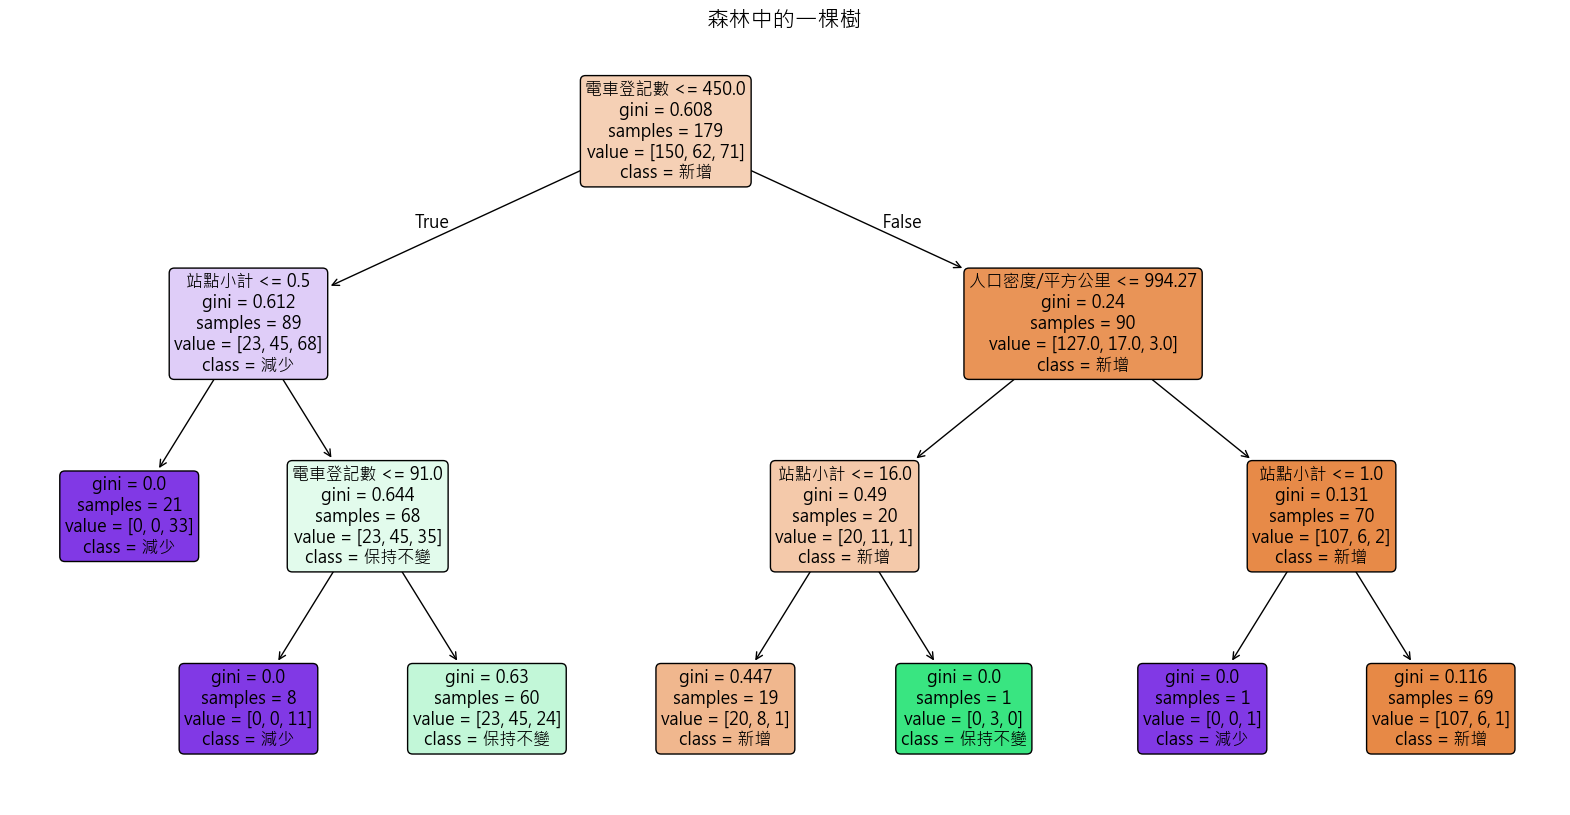

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import cross_val_score   

# Set font to support Chinese characters
matplotlib.rc("font", family="Microsoft JhengHei")

# Load the data
file_path = r"C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\proj_proj\202410合併數據.xlsx"
data = pd.read_excel(file_path)

# Add a new column for the target variable ('新增', '減少', '保持不變')
def classify(row):
    ratio = row['電車登記數'] / row['站點小計'] if row['站點小計'] > 0 else 0
    if ratio < 95:  # 125 - 30 = 95
        return '減少'
    elif ratio > 155:  # 125 + 30 = 155
        return '新增'
    else:
        return '保持不變'

data['決策'] = data.apply(classify, axis=1)

# Encode the target variable
label_map = {'新增': 0, '保持不變': 1, '減少': 2}
data['決策編碼'] = data['決策'].map(label_map)

# Select features and target
features = ['2024人口數', '土地面積', '人口密度/平方公里','電車登記數', '站點小計']
target = '決策編碼'
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=1000,max_features=5)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=label_map.keys())
scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
accuracy = accuracy_score(y_test, y_pred)
print(f'平均準確度: {scores.mean():.2f}')
print(f"模型準確率: {accuracy}")
print(report)


# Visualize one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=features, 
          class_names=list(label_map.keys()), 
          filled=True, 
          rounded=True)
plt.title("森林中的一棵樹", fontsize=16)
plt.show()



2.0

特徵: 2024人口數, 重要性: 0.07
特徵: 土地面積, 重要性: 0.00
特徵: 人口密度/平方公里, 重要性: 0.13
特徵: 電車登記數, 重要性: 0.25
特徵: 站點小計, 重要性: 0.06
特徵: 比例偏離度, 重要性: 0.50
平均準確度: 0.89
模型準確率: 0.9577464788732394
              precision    recall  f1-score   support

          新增       0.94      1.00      0.97        16
        保持不變       0.97      0.94      0.96        34
          減少       0.95      0.95      0.95        21

    accuracy                           0.96        71
   macro avg       0.95      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71



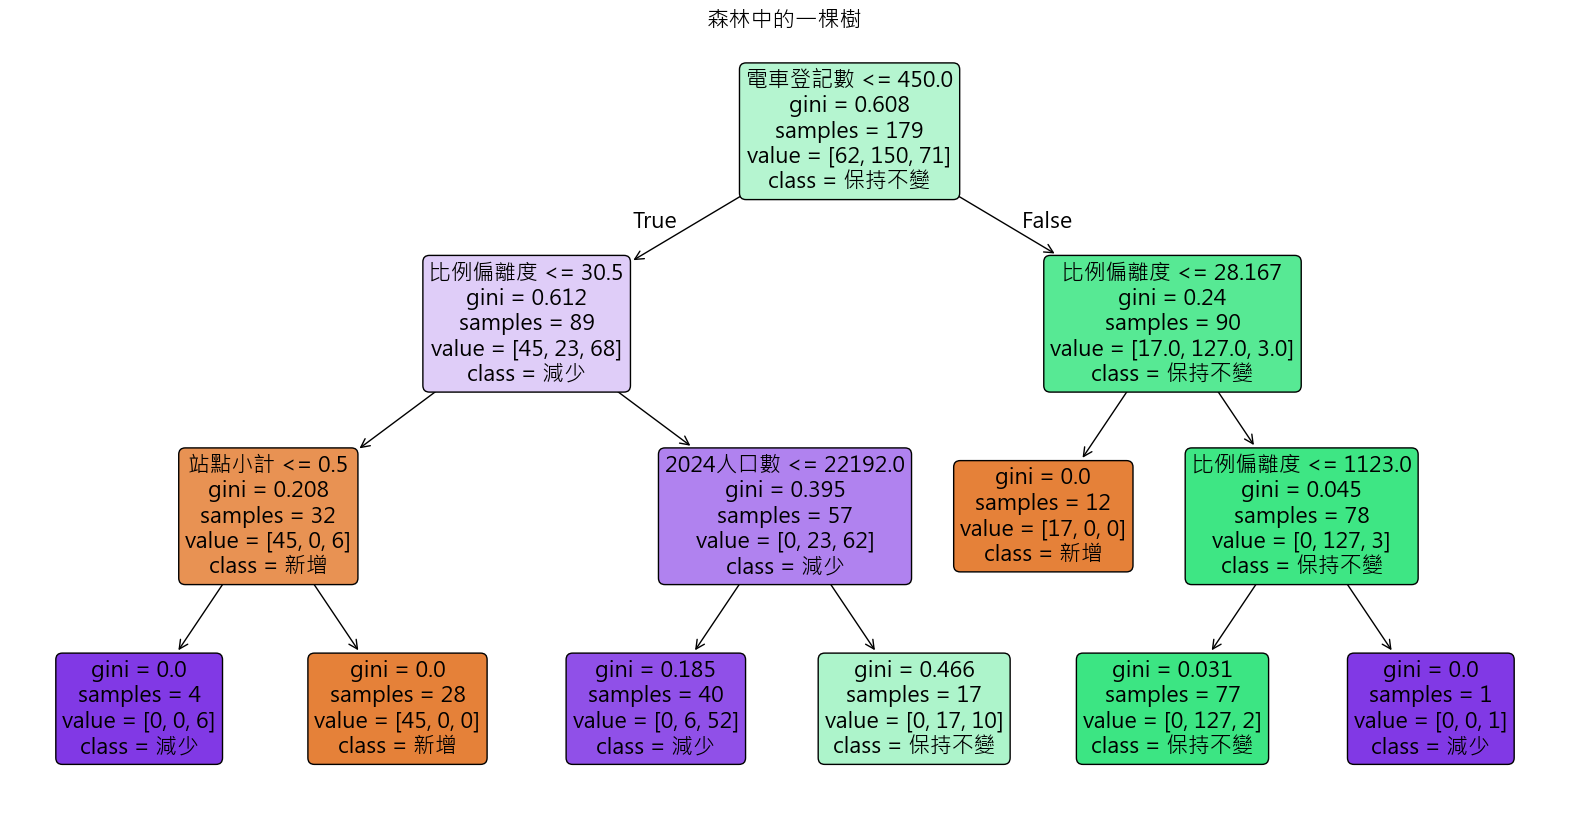

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import cross_val_score   

# Set font to support Chinese characters
matplotlib.rc("font", family="Microsoft JhengHei")

# Load the data
file_path = r"C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\proj_proj\202410合併數據.xlsx"
data = pd.read_excel(file_path)

# Define classify function
def classify(row):
    ratio = row['電車登記數'] / row['站點小計'] if row['站點小計'] > 0 else 0
    if ratio < 95:
        return '減少'
    elif ratio > 155:
        return '新增'
    else:
        return '保持不變'

# Add a new column for the target variable
data['決策'] = data.apply(classify, axis=1)

data['比例偏離度'] = abs((data['電車登記數'] / (data['站點小計'].replace(0, 1))) - 125)

# Select features and target
features = ['2024人口數', '土地面積', '人口密度/平方公里', '電車登記數', '站點小計', '比例偏離度']
target = '決策'
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42,max_depth=3,n_estimators=1000,max_features=5)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=label_map.keys())
scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
accuracy = accuracy_score(y_test, y_pred)
importances = rf_model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"特徵: {feature}, 重要性: {importance:.2f}")

print(f'平均準確度: {scores.mean():.2f}')
print(f"模型準確率: {accuracy}")
print(report)


# Visualize one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], 
          feature_names=features, 
          class_names=list(label_map.keys()), 
          filled=True, 
          rounded=True)
plt.title("森林中的一棵樹", fontsize=16)
plt.show()



UI

In [5]:
from tkinter import ttk
import tkinter as tk
from ttkthemes import ThemedTk
from tkinter.messagebox import showinfo
from PIL import Image, ImageTk  # 使用 Pillow
import matplotlib.pyplot as plt  # 繪製圖表
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class Window(ThemedTk):
    def __init__(self,*args, **kwargs):
        super().__init__(*args, **kwargs)

        self.title("動態圖像介面")

        # 左側框架
        left_frame = tk.Frame(self)

        # 按鈕
        button1 = tk.Button(left_frame, text="決策樹")
        button1.pack(pady=10)
        button2 = tk.Button(left_frame, text="詳細結果")
        button2.pack(pady=10)
        button3 = tk.Button(left_frame, text="重新整理")        
        button3.pack(pady=10)

        # 下拉式選單
        options = ["選項1", "選項2", "選項3"]
        variable = tk.StringVar(self)
        variable.set(options[0])  # 預設值
        dropdown = ttk.Combobox(left_frame, textvariable = variable, values=options)
        dropdown.pack()

        left_frame.pack(side="left")

        # 右側框架
        right_frame = tk.Frame(self)
        # 右側初始圖片
        self.image = Image.open(r"C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\proj_proj\imageedit_2_6435805884.jpg")  # 替換成你的圖片路徑
        self.photo = ImageTk.PhotoImage(self.image)
        label = tk.Label(right_frame, image=self.photo)
        label.pack()
        right_frame.pack(side="right", padx= 15, pady = 15)



        # 切換圖片或圖表的函數
        def switch_image(event):
            global label  # 讓函數能修改全域變數 label
            # 移除舊圖片
            label.destroy()
            # 根據事件來源，決定要顯示的內容
            if event.widget == button1:
                # 繪製圖表1
                fig, ax = plt.subplots()
                # ... 繪製圖表1的程式碼 ...
                canvas = FigureCanvasTkAgg(fig, master=right_frame)
                canvas.draw()
                canvas.get_tk_widget().pack()
            elif event.widget == button2:
                pass
                # 繪製圖表2
                # ... 繪製圖表2的程式碼 ...

            # ... 其他按鈕或下拉選單的處理 ...
            # 將函數綁定到按鈕和下拉選單
        button1.bind("<Button-1>", switch_image)
        button2.bind("<Button-1>", switch_image)
        button3.bind("<Button-1>", switch_image)
        dropdown.bind("<ButtonRelease-1>", switch_image)




def main():
    window = Window(theme="arc")
    window.mainloop()

if __name__ == '__main__':
    main()